In [18]:
import modin.pandas as pd

In [20]:
df= pd.read_csv('ais.csv')

In [21]:
df.head()

,Unnamed: 0,shipid,date_time_utc,flagcode,iceclass,astd_cat,sizegroup_gt,fuelquality,fuelcons,co,...,nox,n2o,nmvoc,ch4,blackcarbon,organiccarbon,dist_nextpoint,sec_nextpoint,longitude,latitude
0,424,78,2021-01-29 04:28:51,NOR,NaN,Fishing vessels,< 1000 GT,0,0.002617,0.000019,...,0.000115,2.094000e-07,0.000006,7.851000e-07,4.711000e-07,1.591200e-06,1038.314,361,16.163984,69.32488
1,425,78,2021-01-29 19:12:12,NOR,NaN,Fishing vessels,< 1000 GT,0,0.001258,0.000009,...,0.000055,1.006000e-07,0.000003,3.773000e-07,2.264000e-07,7.646000e-07,0.542,370,16.136868,69.32401
2,426,78,2021-01-29 19:21:09,NOR,NaN,Fishing vessels,< 1000 GT,0,0.000574,0.000004,...,0.000025,4.600000e-08,0.000001,1.723000e-07,1.034000e-07,3.492000e-07,2.326,169,16.136898,69.32402
3,427,78,2021-01-29 19:42:41,NOR,NaN,Fishing vessels,< 1000 GT,0,0.001258,0.000009,...,0.000055,1.006000e-07,0.000003,3.773000e-07,2.264000e-07,7.646000e-07,1.784,370,16.136850,69.32403
4,428,78,2021-01-29 23:21:42,NOR,NaN,Fishing vessels,< 1000 GT,0,0.001230,0.000009,...,0.000054,9.840000e-08,0.000003,3.691000e-07,2.215000e-07,7.481000e-07,1.429,362,16.136864,69.32401


In [22]:
# check the NAN values
df.isnull().sum()

Unnamed: 0              0
shipid                  0
date_time_utc           0
flagcode            92150
iceclass          1197175
astd_cat                0
sizegroup_gt            0
fuelquality             0
fuelcons                0
co                      0
co2                     0
so2                     0
nox                     0
n2o                     0
nmvoc                   0
ch4                     0
blackcarbon             0
organiccarbon           0
dist_nextpoint          0
sec_nextpoint           0
longitude               0
latitude                0
dtype: int64

In [24]:
# dropping flagcode and iceclass columns as they have most NAN values and unnamed is not important
df.drop(['flagcode','iceclass',"Unnamed: 0"], axis=1, inplace=True)

In [25]:
df.head()

,shipid,date_time_utc,astd_cat,sizegroup_gt,fuelquality,fuelcons,co,co2,so2,nox,n2o,nmvoc,ch4,blackcarbon,organiccarbon,dist_nextpoint,sec_nextpoint,longitude,latitude
0,78,2021-01-29 04:28:51,Fishing vessels,< 1000 GT,0,0.002617,0.000019,0.008340,0.000005,0.000115,2.094000e-07,0.000006,7.851000e-07,4.711000e-07,1.591200e-06,1038.314,361,16.163984,69.32488
1,78,2021-01-29 19:12:12,Fishing vessels,< 1000 GT,0,0.001258,0.000009,0.004032,0.000002,0.000055,1.006000e-07,0.000003,3.773000e-07,2.264000e-07,7.646000e-07,0.542,370,16.136868,69.32401
2,78,2021-01-29 19:21:09,Fishing vessels,< 1000 GT,0,0.000574,0.000004,0.001842,0.000001,0.000025,4.600000e-08,0.000001,1.723000e-07,1.034000e-07,3.492000e-07,2.326,169,16.136898,69.32402
3,78,2021-01-29 19:42:41,Fishing vessels,< 1000 GT,0,0.001258,0.000009,0.004032,0.000002,0.000055,1.006000e-07,0.000003,3.773000e-07,2.264000e-07,7.646000e-07,1.784,370,16.136850,69.32403
4,78,2021-01-29 23:21:42,Fishing vessels,< 1000 GT,0,0.001230,0.000009,0.003945,0.000002,0.000054,9.840000e-08,0.000003,3.691000e-07,2.215000e-07,7.481000e-07,1.429,362,16.136864,69.32401


In [26]:
columns = df.columns
columns

Index(['shipid', 'date_time_utc', 'astd_cat', 'sizegroup_gt', 'fuelquality',
       'fuelcons', 'co', 'co2', 'so2', 'nox', 'n2o', 'nmvoc', 'ch4',
       'blackcarbon', 'organiccarbon', 'dist_nextpoint', 'sec_nextpoint',
       'longitude', 'latitude'],
      dtype='object')

In [27]:
columns =  columns.tolist()

In [28]:
columns

['shipid',
 'date_time_utc',
 'astd_cat',
 'sizegroup_gt',
 'fuelquality',
 'fuelcons',
 'co',
 'co2',
 'so2',
 'nox',
 'n2o',
 'nmvoc',
 'ch4',
 'blackcarbon',
 'organiccarbon',
 'dist_nextpoint',
 'sec_nextpoint',
 'longitude',
 'latitude']

In [30]:
for i in columns:
    if i == 'astd_cat' or i == "sizegroup_gt":
        print(i)
        print(df[i].unique())
        print(df[i].value_counts())
        print('---------------------------------')
    else:
        continue

astd_cat
['Fishing vessels' 'Other service offshore vessels'
 'Refrigerated cargo ships' 'General cargo ships' 'Chemical tankers'
 'Other activities' 'Passenger ships' 'Offshore supply ships'
 'Oil product tankers' 'Container ships' 'Ro-Ro cargo ships'
 'Bulk carriers' 'Crude oil tankers' 'Gas tankers' 'Cruise ships']
astd_cat
Fishing vessels                   970170
Passenger ships                   247968
Other activities                  191096
General cargo ships                96324
Offshore supply ships              57667
Refrigerated cargo ships           32759
Bulk carriers                      30824
Crude oil tankers                  21154
Oil product tankers                19409
Gas tankers                        15628
Other service offshore vessels     15247
Chemical tankers                   13682
Cruise ships                       13367
Ro-Ro cargo ships                   6377
Container ships                      239
Name: count, dtype: int64
------------------------------

In [34]:
df.drop(["dist_nextpoint","sec_nextpoint"], axis=1, inplace=True)

In [35]:
df.head()

,shipid,astd_cat,sizegroup_gt,fuelquality,fuelcons,co,co2,so2,nox,n2o,nmvoc,ch4,blackcarbon,organiccarbon,longitude,latitude
0,78,Fishing vessels,< 1000 GT,0,0.002617,0.000019,0.008340,0.000005,0.000115,2.094000e-07,0.000006,7.851000e-07,4.711000e-07,1.591200e-06,16.163984,69.32488
1,78,Fishing vessels,< 1000 GT,0,0.001258,0.000009,0.004032,0.000002,0.000055,1.006000e-07,0.000003,3.773000e-07,2.264000e-07,7.646000e-07,16.136868,69.32401
2,78,Fishing vessels,< 1000 GT,0,0.000574,0.000004,0.001842,0.000001,0.000025,4.600000e-08,0.000001,1.723000e-07,1.034000e-07,3.492000e-07,16.136898,69.32402
3,78,Fishing vessels,< 1000 GT,0,0.001258,0.000009,0.004032,0.000002,0.000055,1.006000e-07,0.000003,3.773000e-07,2.264000e-07,7.646000e-07,16.136850,69.32403
4,78,Fishing vessels,< 1000 GT,0,0.001230,0.000009,0.003945,0.000002,0.000054,9.840000e-08,0.000003,3.691000e-07,2.215000e-07,7.481000e-07,16.136864,69.32401


In [36]:
df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 1731911 entries, 0 to 1731910
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   shipid         int64  
 1   astd_cat       object 
 2   sizegroup_gt   object 
 3   fuelquality    int64  
 4   fuelcons       float64
 5   co             float64
 6   co2            float64
 7   so2            float64
 8   nox            float64
 9   n2o            float64
 10  nmvoc          float64
 11  ch4            float64
 12  blackcarbon    float64
 13  organiccarbon  float64
 14  longitude      float64
 15  latitude       float64
dtypes: float64(12), int64(2), object(2)
memory usage: 211.4+ MB


In [37]:
df.describe()

,shipid,fuelquality,fuelcons,co,co2,so2,nox,n2o,nmvoc,ch4,blackcarbon,organiccarbon,longitude,latitude
count,1.731911e+06,1.731911e+06,1.731911e+06,1.731911e+06,1.731911e+06,1.731911e+06,1.731911e+06,1.731911e+06,1.731911e+06,1.731911e+06,1.731911e+06,1.731911e+06,1.731911e+06,1.731911e+06
mean,2.317590e+03,9.264171e-01,5.068527e-02,3.681045e-04,1.615069e-01,3.311406e-04,3.212037e-03,4.235623e-06,1.196287e-04,1.488181e-05,9.123351e-06,3.013304e-05,2.285140e+01,7.073520e+01
std,1.541447e+03,2.108166e+00,4.772491e-01,3.497178e-03,1.522238e+00,4.337653e-03,3.556201e-02,3.994988e-05,1.135077e-03,1.416481e-04,8.590485e-05,2.869957e-04,1.510577e+01,1.910502e+00
min,4.000000e+00,0.000000e+00,3.578000e-07,2.600000e-09,1.147000e-06,6.000000e-10,1.570000e-08,0.000000e+00,9.000000e-10,1.000000e-10,1.000000e-10,2.000000e-10,-1.798085e+02,5.706266e+01
25%,3.950000e+02,0.000000e+00,1.254190e-03,9.281000e-06,4.020933e-03,2.257500e-06,5.518440e-05,1.003000e-07,3.010100e-06,3.763000e-07,2.258000e-07,7.625000e-07,1.895404e+01,6.969762e+01
50%,3.234000e+03,0.000000e+00,4.765200e-03,3.526250e-05,1.522413e-02,8.961400e-06,2.096688e-04,3.812000e-07,1.143650e-05,1.429600e-06,8.577000e-07,2.897200e-06,2.227620e+01,7.040219e+01
75%,3.504000e+03,0.000000e+00,1.708080e-02,1.221502e-04,5.453987e-02,3.344690e-05,7.332463e-04,1.374900e-06,3.968800e-05,4.916400e-06,3.074500e-06,9.964000e-06,2.596555e+01,7.103644e+01
max,7.481000e+03,6.000000e+00,9.077078e+01,6.717038e-01,2.900769e+02,8.813090e-01,7.052553e+00,8.736114e-03,2.178499e-01,2.723123e-02,1.633874e-02,5.518863e-02,1.799980e+02,8.030193e+01


In [41]:
emission_columns =['co', 'co2', 'so2', 'nox', 'n2o', 'nmvoc', 'ch4', 'blackcarbon', 'organiccarbon']

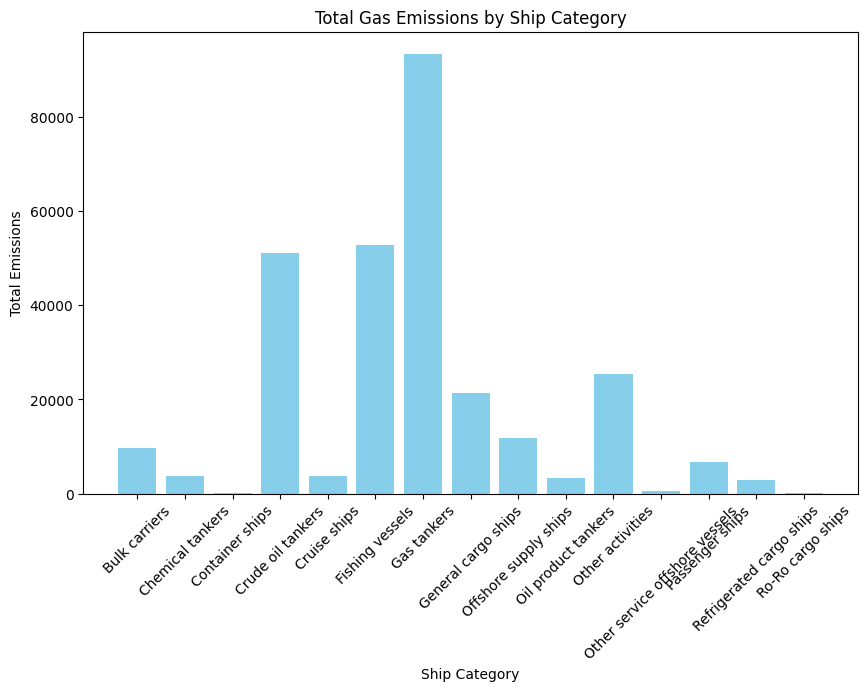

In [42]:
import matplotlib.pyplot as plt
# Sum emissions for each category
df['total_emissions'] = df[emission_columns].sum(axis=1)
category_emissions = df.groupby('astd_cat')['total_emissions'].sum().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(category_emissions['astd_cat'], category_emissions['total_emissions'], color='skyblue')
plt.title('Total Gas Emissions by Ship Category')
plt.xlabel('Ship Category')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45)
plt.show()

as we can see fishing vessels are emitting the most gasses, lets check their count with respect to other categories

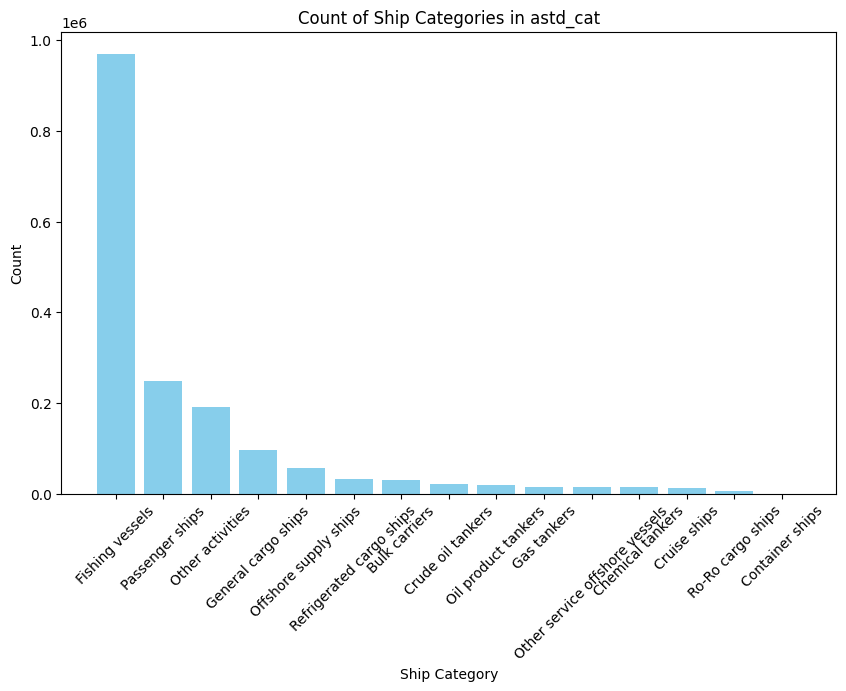

In [43]:
# Count the occurrences of each category in 'astd_cat'
category_counts = df['astd_cat'].value_counts().reset_index()
category_counts.columns = ['astd_cat', 'count']

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(category_counts['astd_cat'], category_counts['count'], color='skyblue')
plt.title('Count of Ship Categories in astd_cat')
plt.xlabel('Ship Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

fishing vessels are the most ships in dataset which might be the cause of most emittion

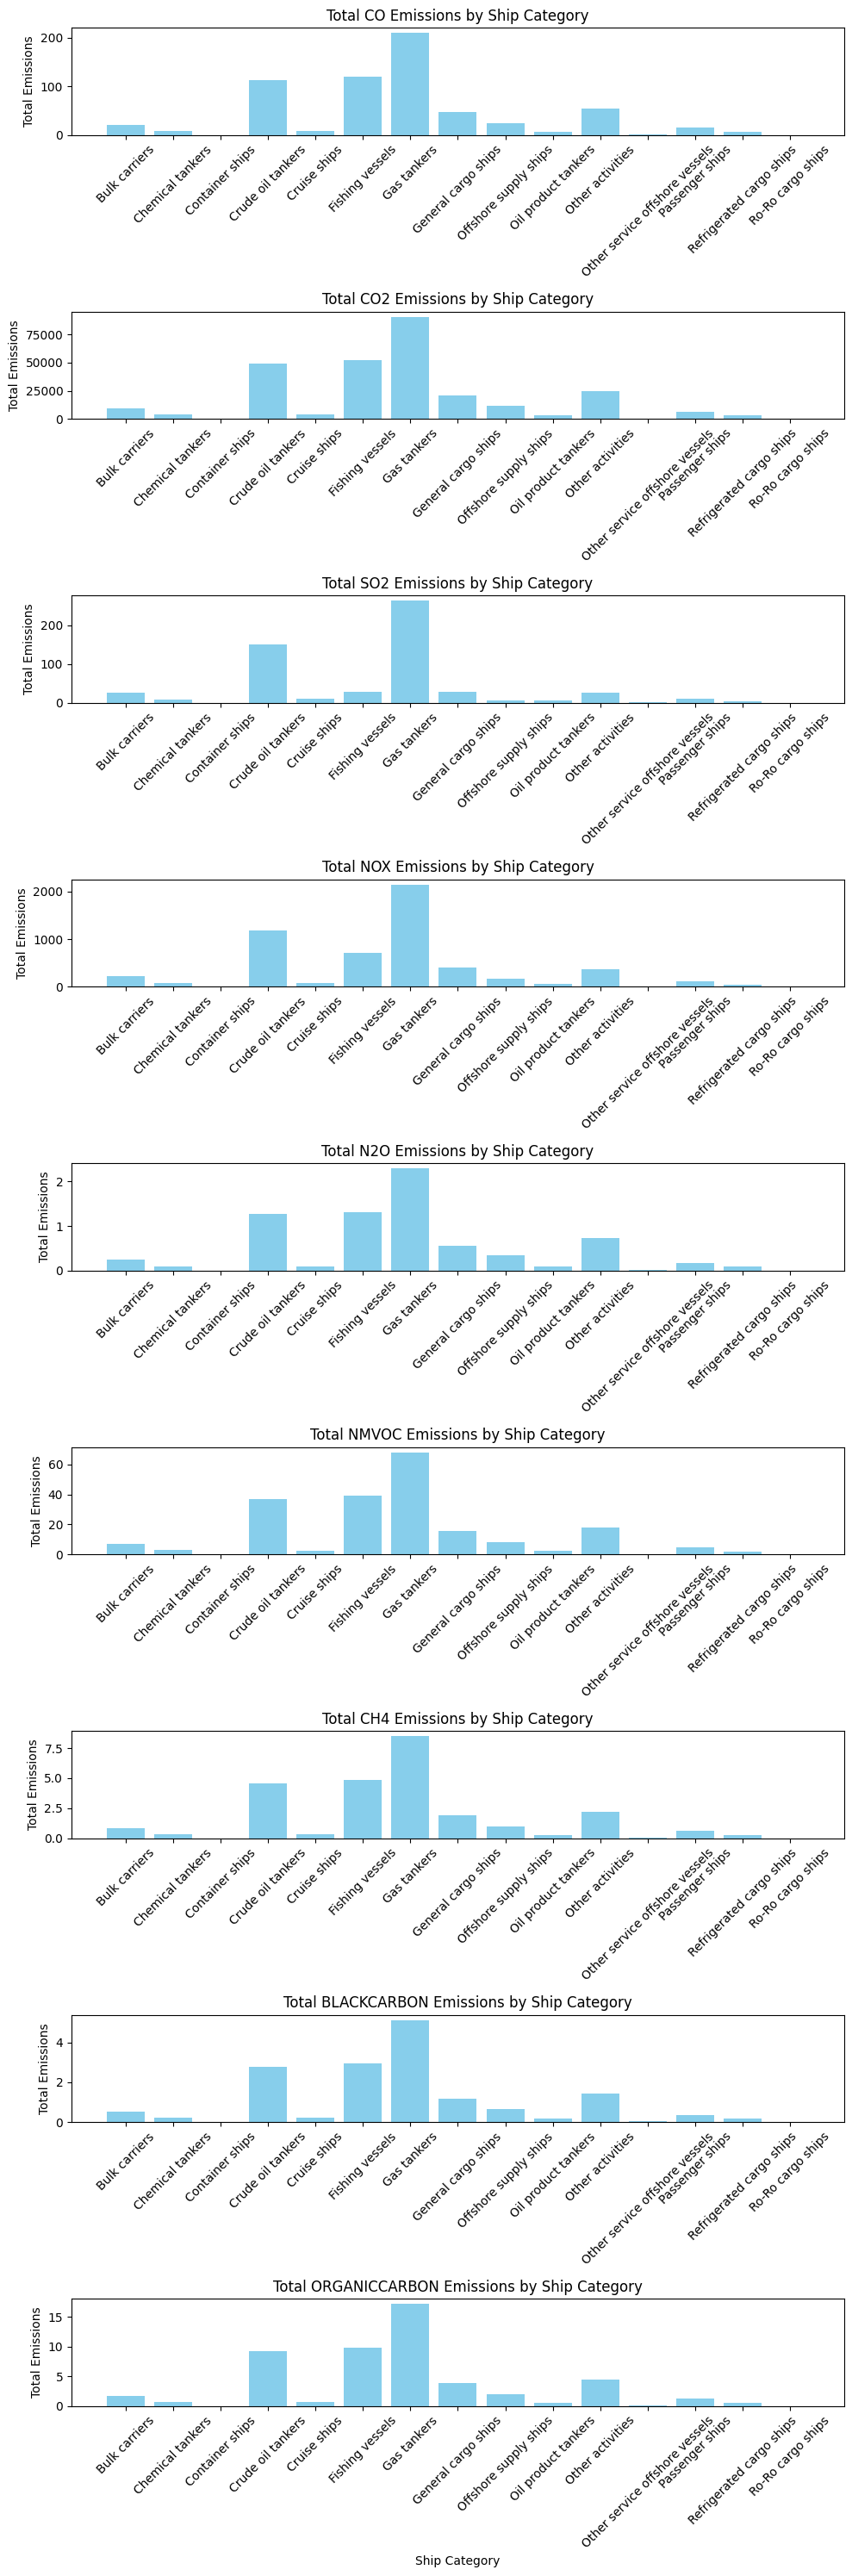

In [48]:


# Group by 'astd_cat' and sum the emissions for each gas
category_emissions = df.groupby('astd_cat')[emission_columns].sum().reset_index()

# Plot the results
fig, axes = plt.subplots(len(emission_columns), 1, figsize=(10, 30))


for i, gas in enumerate(emission_columns):
    axes[i].bar(category_emissions['astd_cat'], category_emissions[gas], color='skyblue')
    axes[i].set_title(f'Total {gas.upper()} Emissions by Ship Category')
    axes[i].set_ylabel('Total Emissions')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xticks(range(len(category_emissions['astd_cat'])))
    axes[i].set_xticklabels(category_emissions['astd_cat'])

    # Ensure x-axis labels are shown for each subplot
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(45)

plt.xlabel('Ship Category')
plt.tight_layout()
plt.show()

In [49]:
# Sum the emissions for each gas
total_emissions = df[emission_columns].sum()

# Find the gas with the highest total emission
most_emitted_gas = total_emissions.idxmax()
most_emitted_gas_amount = total_emissions.max()

print(f"The most emitted gas is {most_emitted_gas} with a total emission of {most_emitted_gas_amount}")

The most emitted gas is co2 with a total emission of 279715.6195202263
